In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
plt.rc('font', family='AppleGothic')
print(plt.figure().dpi)

100.0


<Figure size 640x480 with 0 Axes>

In [2]:
exercise_df = pd.read_csv("../data/raw/exercise.csv")

In [3]:
exercise_df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [4]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  90 non-null     int64 
 1   id          90 non-null     int64 
 2   diet        90 non-null     object
 3   pulse       90 non-null     int64 
 4   time        90 non-null     object
 5   kind        90 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.3+ KB


In [39]:
exercise_df.describe()

,id,pulse
count,90.000000,90.000000
mean,15.500000,99.700000
std,8.703932,14.858471
min,1.000000,80.000000
25%,8.000000,90.250000
50%,15.500000,96.000000
75%,23.000000,103.000000
max,30.000000,150.000000


In [40]:
exercise_df.describe(include='object')

,diet,time,kind
count,90,90,90
unique,2,3,3
top,low fat,1 min,rest
freq,45,30,30


In [6]:
sum(exercise_df.duplicated())

0

In [7]:
exercise_df.isna().sum()

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64

In [8]:
exercise_df = exercise_df.drop(columns='Unnamed: 0')

In [9]:
exercise_df.to_csv('../data/processed/clean_exercise.csv', index=False)

In [10]:
pulse_mean = exercise_df['pulse'].mean()
pulse_median = exercise_df['pulse'].median()
pulse_std = exercise_df['pulse'].std()

print(pulse_mean)
print(pulse_median)
print(pulse_std)

99.7
96.0
14.858470893849434


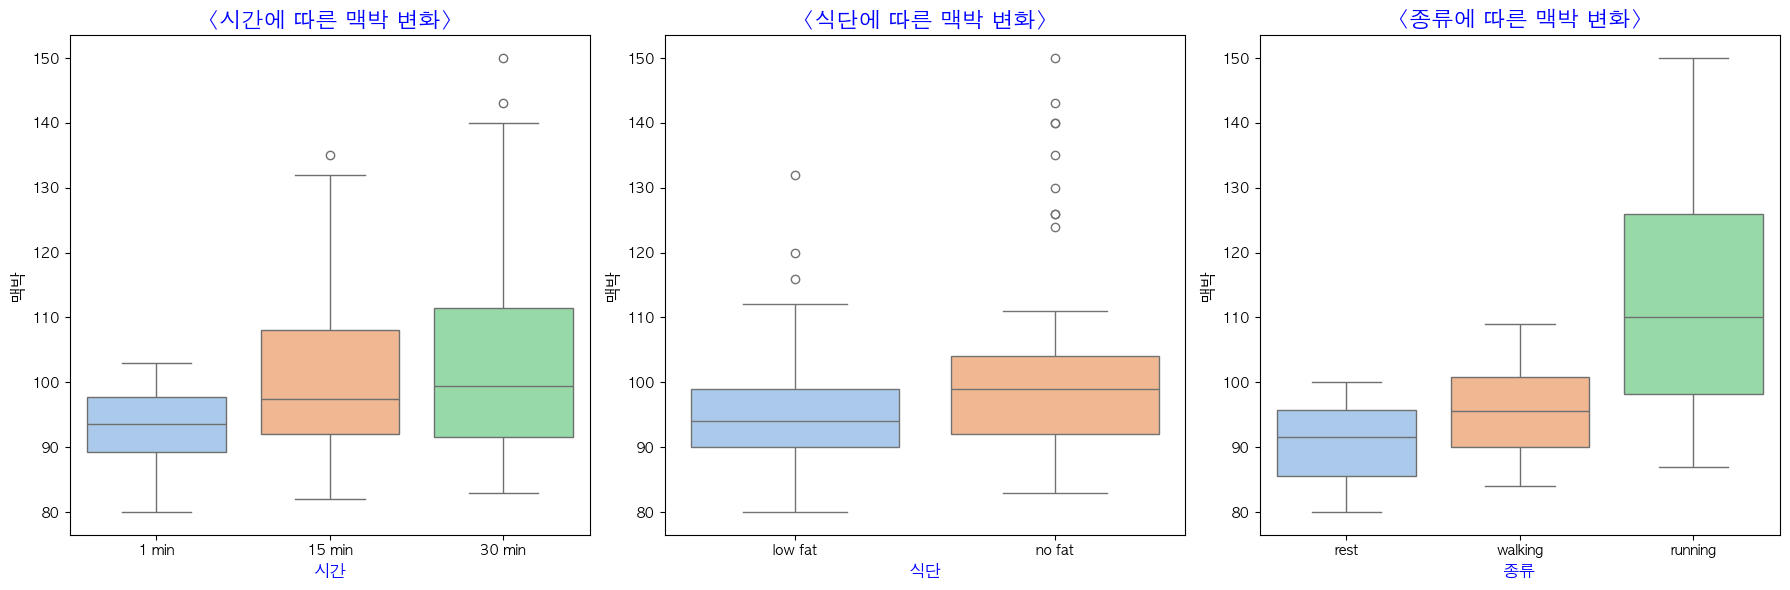

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=exercise_df, x='time', y='pulse', hue='time', palette='pastel', ax=axes[0])
axes[0].set_title('<시간에 따른 맥박 변화>', fontsize=16, fontweight='bold', color='blue')
axes[0].set_xlabel('시간', fontsize=12, color='blue')
axes[0].set_ylabel('맥박', fontsize=12)

sns.boxplot(data=exercise_df, x='diet', y='pulse', hue='diet', palette='pastel', ax=axes[1])
axes[1].set_title('<식단에 따른 맥박 변화>', fontsize=16, fontweight='bold', color='blue')
axes[1].set_xlabel('식단', fontsize=12, color='blue')
axes[1].set_ylabel('맥박', fontsize=12)

sns.boxplot(data=exercise_df, x='kind', y='pulse', hue='kind', palette='pastel', ax=axes[2])
axes[2].set_title('<종류에 따른 맥박 변화>', fontsize=16, fontweight='bold', color='blue')
axes[2].set_xlabel('종류', fontsize=12, color='blue')
axes[2].set_ylabel('맥박', fontsize=12)


plt.savefig('../results/visualiztions/pulse_duration_by_time_diet_kind.png')
plt.tight_layout()
plt.show()

In [11]:
kind_pulse_mean = exercise_df.groupby('kind')['pulse'].mean(numeric_only=True).reset_index()
kind_pulse_mean

,kind,pulse
0,rest,90.833333
1,running,113.066667
2,walking,95.200000
